In [1]:
# Loading necessary libraries and tools
import pydotplus
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import Imputer

In [2]:
# reading in CSV file
mongoose_df = pd.read_csv("all mongoose data.csv")

In [3]:
# separating the sexes into different datasets
male_df = mongoose_df.loc[mongoose_df['sex'] == 'M', :]
female_df = mongoose_df.loc[mongoose_df['sex'] == 'F', :]

In [4]:
# creating different sets of predictor variables for each sex
attribute_columns_male = ['mass', 'head', 'skull.width', 'body', 'tail', 'body.tail', 'neck',
                         'chest', 'testes.r', 'foot.r', 'lt.tooth', 'lb.tooth', 'ap', 'pc1.all']
attribute_columns_female = ['mass', 'head', 'skull.width', 'body', 'tail', 'body.tail', 'neck',
                         'chest', 'foot.r', 'lt.tooth', 'lb.tooth', 'ap', 'pc1.all']

# creating the dependent variable
# the CSV file already has a column "India" with values as 0 or 1 for
# individuals that either are or are not from India
predicted_column = ['India']

In [5]:
# setting the response variable for each sex
Y_male = male_df[predicted_column].copy()
Y_female = female_df[predicted_column].copy()

In [6]:
# Accommodate for missing values:
# First, set up predictor variables without adjusting for missing values
X_raw_male = male_df[attribute_columns_male].copy()
X_raw_female = female_df[attribute_columns_female].copy()

In [7]:
# set up adjustment to replace missing values with overall mean values
imp = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)

In [8]:
# create final predictor variable lists for each sex
X_male = pd.DataFrame(imp.fit_transform(X_raw_male), columns = X_raw_male.columns)
X_female = pd.DataFrame(imp.fit_transform(X_raw_female), columns = X_raw_female.columns)

In [9]:
# set up decision tree classifier for male data
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_male, Y_male)

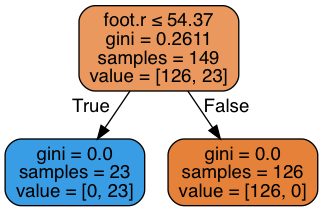

In [10]:
# Create and view decision tree
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=X_raw_male.columns,
                                filled=True, rounded=True,
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
from IPython.display import Image
Image(graph.create_png())

In [11]:
# It's pretty clear that the right hind foot very cleanly separates the groups
# but let's verfiy

# For such a small dataset, I used cross validation. This separates the data into "folds
# of equal size, and holds out one fold as a test set, and then uses the remaining sets
# to train. It does this for each fold. Then returns the test score for each round of training.

# But first to adjust reshape the predictor variable for cross validation function
c, r = Y_male.shape
Y_m = Y_male.as_matrix().reshape(c,)

from sklearn.model_selection import cross_val_score
cross_val_score(tree.DecisionTreeClassifier(), X_male, Y_m, cv=10)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [12]:
# Normally, I would average the scores for each fold and view the standard deviation,
# but as you can see from the output array, 
# each score returned a 1.0, so no variation exists.

# Display a classification report
from sklearn import metrics
print("Classification Report:\n%s\n" % (
    metrics.classification_report(
        Y_male,
        clf.predict(X_male))))

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       126
          1       1.00      1.00      1.00        23

avg / total       1.00      1.00      1.00       149




In [13]:
# Display accuracy of the decision tree
print("Accuracy:\n%s\n" % (
    metrics.accuracy_score(Y_male,clf.predict(X_male))))

Accuracy:
1.0



In [14]:
# Now to investigate females
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_female, Y_female)

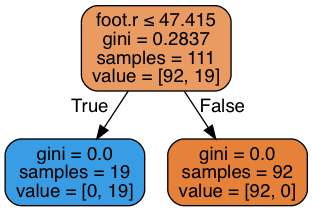

In [15]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=X_raw_female.columns,
                                filled=True, rounded=True,
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [16]:
# the tree looks identical to the males' but let's check with cross validation
c, r = Y_female.shape
Y_f = Y_female.as_matrix().reshape(c,)

cross_val_score(tree.DecisionTreeClassifier(), X_female, Y_f, cv=10)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [17]:
# once again, all folds returned a perfect 1.0 score, and thus no variation

print("Classification Report:\n%s\n" % (
    metrics.classification_report(
        Y_female,
        clf.predict(X_female))))

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        92
          1       1.00      1.00      1.00        19

avg / total       1.00      1.00      1.00       111




In [18]:
print("Accuracy:\n%s\n" % (
    metrics.accuracy_score(Y_female,clf.predict(X_female))))

Accuracy:
1.0



In [19]:
# It appears as though the length of the hind foot is a perfect tool to determine if a 
# particular individual (male or female) originated from the species' native range of 
# India, or one of four tropical, introduced locations where other specimens were sampled.

# It's not entirely clear why foot length is the most decisive factor in classifying
# individuals. Foot length is often used as a metric for body size, but several studies
# have shown that it is not always a reliable tool.

# That all introduced locations show a large difference in hind foot length relative to
# the native range suggests that selection is the driving force behind the change, rather
# than random (i.e., genetic drift) forces. However, the absence of predation and inter-
# specific competition in introduced locations likely relaxes selection on attributes
# related to foot size, such as running speed or climbing efficieny. Thus we would have
# expected to see more random or multi-directional changes (i.e., some locations have
# small feet while others have larger feet relative to the native range).

# Further investigations are needed to understand this marked difference in hind foot length.